# Intensity

In this notebook we conduct measurements with the photodiode and different constellations of the acousto-optic deflectors.

Thorlabs photodiode is set to 50dB.

In [3]:
import os
import control
import transform
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

os.makedirs('../dataset/intensity', exist_ok=True)
os.makedirs('../figure/intensity', exist_ok=True)

In [ ]:
control.aom()
control.aod_h(frequency=100e6)
control.aod_v(frequency=100e6)

scope = control.MSOX6004A('172.22.22.30')
scope.holla()

We will do multiple runs at different amplitudes. The following function will merge these runs into a single data frame with one time scale but different voltages for the different amplitude levels.

In [72]:
def data_to_hdf(filename, fieldname, data):
    df = pd.DataFrame({'time': data[0][1]['time'], **{f'voltage@{d[0]:.2f}': d[1]['voltage'] for d in data}})
    df.to_hdf(filename, fieldname, complevel=9)
    
    return df

## Unpaired

The unpaired measurements consider the constellation of only one single AOD mounted at a time.

### Horizontal AOD

We start with the AOD element anticipated to be in the horizontal slot.

#### Horizontal Slot

In the first run we will remove the vertical AOD element. The horizontal AOD element remains in the horizontal slot. We optimize incident beam angle for maximum first diffraction order intensity at 100 MHz and check beam alignment through the setup.

In [74]:
data = []

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[90e6, 110e6], duration=26.84e-3, amplitude=A*np.ones(1024), nodwells=[False, True])

    data.append((A, scope.capture()))

data_to_hdf('../dataset/intensity/unpaired-amplitude.h5', 'horizontal_element_horizontal_socket', data).head(5)

,time,voltage@0.20,voltage@0.22,voltage@0.24,voltage@0.26,voltage@0.28,voltage@0.30,voltage@0.32,voltage@0.34,voltage@0.36,...,voltage@0.82,voltage@0.84,voltage@0.86,voltage@0.88,voltage@0.90,voltage@0.92,voltage@0.94,voltage@0.96,voltage@0.98,voltage@1.00
0,-0.000394,1.324326,1.530518,1.762485,2.020225,2.277966,2.587254,2.948091,3.334702,3.669765,...,5.370852,5.319304,5.241982,5.241982,5.164660,5.087338,5.010015,4.984241,4.958467,4.932693
1,-0.000393,1.324326,1.504744,1.788259,1.994451,2.303740,2.587254,2.948091,3.360476,3.695539,...,5.345078,5.293530,5.216208,5.190434,5.164660,5.087338,5.035789,5.035789,4.932693,4.932693
2,-0.000393,1.324326,1.530518,1.814033,2.045999,2.277966,2.638802,2.973865,3.386250,3.669765,...,5.345078,5.319304,5.241982,5.190434,5.138886,5.113112,5.035789,5.010015,5.010015,4.906919
3,-0.000392,1.298552,1.504744,1.736711,1.994451,2.329514,2.638802,2.948091,3.334702,3.643991,...,5.370852,5.319304,5.216208,5.241982,5.138886,5.113112,5.010015,5.010015,4.958467,4.932693
4,-0.000392,1.350100,1.504744,1.736711,2.020225,2.303740,2.613028,2.922317,3.334702,3.669765,...,5.370852,5.319304,5.216208,5.216208,5.164660,5.087338,5.035789,4.984241,4.984241,4.906919


#### Vertical Slot

We extract the horizontal AOD element from the horizontal slot and insert it into the vertical slot. We again optimize for 
maximum first order intensity and check beam alignment.

In [81]:
data = []

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[90e6, 110e6], duration=26.84e-3, amplitude=A*np.ones(1024), nodwells=[False, True])

    data.append((A, scope.capture()))

data_to_hdf('../dataset/intensity/unpaired-amplitude.h5', 'horizontal_element_vertical_socket', data).head(5)

,time,voltage@0.20,voltage@0.22,voltage@0.24,voltage@0.26,voltage@0.28,voltage@0.30,voltage@0.32,voltage@0.34,voltage@0.36,...,voltage@0.82,voltage@0.84,voltage@0.86,voltage@0.88,voltage@0.90,voltage@0.92,voltage@0.94,voltage@0.96,voltage@0.98,voltage@1.00
0,-0.000394,0.066046,0.084456,0.102866,0.102866,0.102866,0.102866,0.139686,0.139686,0.139686,...,0.434247,0.434247,0.434247,0.452657,0.452657,0.452657,0.489477,0.471067,0.452657,0.489477
1,-0.000393,0.084456,0.066046,0.102866,0.084456,0.139686,0.102866,0.139686,0.158096,0.139686,...,0.434247,0.397427,0.452657,0.434247,0.434247,0.452657,0.452657,0.471067,0.489477,0.471067
2,-0.000393,0.066046,0.084456,0.102866,0.084456,0.084456,0.121276,0.102866,0.121276,0.176506,...,0.434247,0.452657,0.434247,0.452657,0.471067,0.452657,0.452657,0.471067,0.471067,0.489477
3,-0.000392,0.066046,0.102866,0.066046,0.084456,0.066046,0.121276,0.121276,0.121276,0.158096,...,0.434247,0.452657,0.452657,0.434247,0.452657,0.471067,0.452657,0.471067,0.471067,0.489477
4,-0.000392,0.084456,0.066046,0.084456,0.102866,0.084456,0.139686,0.139686,0.139686,0.102866,...,0.434247,0.434247,0.452657,0.434247,0.434247,0.434247,0.434247,0.471067,0.471067,0.489477


### Vertical AOD

Now we remove the horizontal AOD element and mount the vertical AOD element into the vertical slot. We repeat same alignments as before.

#### Vertical Slot

In [89]:
data = []

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[90e6, 110e6], duration=26.84e-3, amplitude=A*np.ones(1024), nodwells=[False, True])

    data.append((A, scope.capture()))

data_to_hdf('../dataset/intensity/unpaired-amplitude.h5', 'vertical_element_vertical_socket', data).head(5)

,time,voltage@0.20,voltage@0.22,voltage@0.24,voltage@0.26,voltage@0.28,voltage@0.30,voltage@0.32,voltage@0.34,voltage@0.36,...,voltage@0.82,voltage@0.84,voltage@0.86,voltage@0.88,voltage@0.90,voltage@0.92,voltage@0.94,voltage@0.96,voltage@0.98,voltage@1.00
0,-0.000394,0.093515,0.110251,0.110251,0.110251,0.110251,0.126987,0.143724,0.143724,0.143724,...,0.57887,0.562134,0.578870,0.595607,0.595607,0.595607,0.612343,0.629079,0.629079,0.629079
1,-0.000393,0.093515,0.093515,0.093515,0.110251,0.126987,0.126987,0.143724,0.126987,0.177197,...,0.57887,0.578870,0.562134,0.595607,0.612343,0.612343,0.629079,0.629079,0.612343,0.612343
2,-0.000393,0.076778,0.093515,0.093515,0.110251,0.110251,0.126987,0.160460,0.160460,0.160460,...,0.57887,0.578870,0.562134,0.595607,0.595607,0.612343,0.612343,0.612343,0.612343,0.629079
3,-0.000392,0.076778,0.093515,0.110251,0.126987,0.093515,0.126987,0.143724,0.143724,0.160460,...,0.57887,0.562134,0.578870,0.612343,0.612343,0.612343,0.629079,0.629079,0.612343,0.612343
4,-0.000392,0.076778,0.060042,0.093515,0.110251,0.110251,0.126987,0.143724,0.143724,0.177197,...,0.57887,0.562134,0.595607,0.595607,0.612343,0.612343,0.629079,0.629079,0.629079,0.645816


#### Horizontal Slot

Vertical AOD is now placed into the horizontal slot and calibrations steps are repeated as before.

In [98]:
data = []

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[90e6, 110e6], duration=26.84e-3, amplitude=A*np.ones(1024), nodwells=[False, True])

    data.append((A, scope.capture()))

data_to_hdf('../dataset/intensity/unpaired-amplitude.h5', 'vertical_element_horizontal_socket', data).head(5)

,time,voltage@0.20,voltage@0.22,voltage@0.24,voltage@0.26,voltage@0.28,voltage@0.30,voltage@0.32,voltage@0.34,voltage@0.36,...,voltage@0.82,voltage@0.84,voltage@0.86,voltage@0.88,voltage@0.90,voltage@0.92,voltage@0.94,voltage@0.96,voltage@0.98,voltage@1.00
0,-0.000394,0.029448,0.029448,0.040828,0.040828,0.052209,0.063590,0.052209,0.074971,0.074971,...,0.757816,0.803339,0.848862,0.883004,0.917146,0.951289,1.008192,1.030954,1.053715,1.076477
1,-0.000393,0.040828,0.040828,0.040828,0.040828,0.052209,0.063590,0.063590,0.052209,0.074971,...,0.780577,0.803339,0.860243,0.883004,0.917146,0.962669,0.996812,1.019573,1.053715,1.087858
2,-0.000393,0.018067,0.029448,0.018067,0.052209,0.052209,0.040828,0.063590,0.074971,0.063590,...,0.746435,0.803339,0.848862,0.894385,0.939908,0.951289,1.008192,1.042335,1.065096,1.087858
3,-0.000392,0.029448,0.040828,0.052209,0.040828,0.029448,0.063590,0.052209,0.074971,0.063590,...,0.769197,0.803339,0.860243,0.883004,0.939908,0.951289,1.008192,1.042335,1.042335,1.065096
4,-0.000392,0.040828,0.029448,0.052209,0.029448,0.052209,0.052209,0.052209,0.063590,0.063590,...,0.757816,0.791958,0.871623,0.894385,0.939908,0.974050,0.996812,1.030954,1.053715,1.087858


## Paired

The following constellations consider both AODs mounted and in use.

### Exchanged

Horizontal AOD is in vertical slot and feeded with vertical signal. Vertical AOD is in horizontal slot and feeded with horizontal signal. Because of weak signal photodiode is set to 70dB.

#### Sweep at different Frequencies

We apply a constant frequency to the vertical AOD and then sweep the horizontal AOD, whichafter we increase the frequency of the vertical AOD by 0.1MHz. This is done until the vertical AOD frequency reaches 110MHz.

In [129]:
data = []

control.aod_h(frequency=[90e6, 110e6], duration=26.84e-3, amplitude=1*np.ones(1024), nodwells=[False, True])

for f_v in np.arange(90e6, 110e6+1e5, 1e5):
    control.aod_v(frequency=f_v)

    data.append((f_v, scope.capture()))
    
data_to_hdf('../dataset/intensity/paired-exchanged-frequency.h5', 'vsweep', data).head(5)

Exception ignored in: <object repr() failed>
Traceback (most recent call last):
  File "/Users/bodokaiser/.pyenv/versions/3.6.5/envs/jupyter/lib/python3.6/site-packages/pyvisa/resources/resource.py", line 108, in __del__
    self.close()
  File "/Users/bodokaiser/.pyenv/versions/3.6.5/envs/jupyter/lib/python3.6/site-packages/pyvisa/resources/resource.py", line 244, in close
    self.visalib.close(self.session)
  File "/Users/bodokaiser/.pyenv/versions/3.6.5/envs/jupyter/lib/python3.6/site-packages/pyvisa/ctwrapper/functions.py", line 394, in close
    return library.viClose(session)
  File "/Users/bodokaiser/.pyenv/versions/3.6.5/envs/jupyter/lib/python3.6/site-packages/pyvisa/ctwrapper/highlevel.py", line 188, in _return_handler
    raise errors.VisaIOError(ret_value)
pyvisa.errors.VisaIOError: VI_ERROR_CLOSING_FAILED (-1073807338): The VISA driver failed to properly close the session or object reference. This might be due to an error freeing internal or OS resources, a failed network

,time,voltage@90000000.00,voltage@90100000.00,voltage@90200000.00,voltage@90300000.00,voltage@90400000.00,voltage@90500000.00,voltage@90600000.00,voltage@90700000.00,voltage@90800000.00,...,voltage@109100000.00,voltage@109200000.00,voltage@109300000.00,voltage@109400000.00,voltage@109500000.00,voltage@109600000.00,voltage@109700000.00,voltage@109800000.00,voltage@109900000.00,voltage@110000000.00
0,-0.001042,0.117486,0.119930,0.124817,0.127260,0.132147,0.129704,0.132147,0.141922,0.139478,...,0.100382,0.097938,0.100382,0.097938,0.095495,0.090608,0.088164,0.085721,0.085721,0.083277
1,-0.001042,0.117486,0.124817,0.124817,0.127260,0.129704,0.134591,0.134591,0.141922,0.139478,...,0.102825,0.100382,0.097938,0.097938,0.095495,0.088164,0.090608,0.085721,0.090608,0.083277
2,-0.001041,0.117486,0.122373,0.127260,0.124817,0.129704,0.134591,0.137035,0.141922,0.141922,...,0.097938,0.100382,0.095495,0.097938,0.090608,0.088164,0.088164,0.085721,0.085721,0.080834
3,-0.001041,0.115043,0.122373,0.124817,0.127260,0.127260,0.129704,0.137035,0.144365,0.137035,...,0.100382,0.100382,0.100382,0.097938,0.095495,0.090608,0.090608,0.088164,0.085721,0.083277
4,-0.001040,0.115043,0.124817,0.124817,0.129704,0.127260,0.129704,0.137035,0.141922,0.139478,...,0.100382,0.100382,0.097938,0.097938,0.095495,0.090608,0.090608,0.085721,0.085721,0.080834


Now we apply a constant frequency to the AOD in the horizontal slot and sweep the frequency of the AOD in the vertical slot, whichafter the frequency of the AOD in the horizontal slot is increased by 0.1 MHz.

In [133]:
data = []

control.aod_v(frequency=[90e6, 110e6], duration=26.84e-3, amplitude=np.ones(1024), nodwells=[False, True])

for f_h in np.arange(90e6, 110e6+1e5, 1e5):
    control.aod_h(frequency=f_h)

    data.append((f_h, scope.capture()))
    
data_to_hdf('../dataset/intensity/paired-exchanged-frequency.h5', 'hsweep', data).head(5)

,time,voltage@90000000.00,voltage@90100000.00,voltage@90200000.00,voltage@90300000.00,voltage@90400000.00,voltage@90500000.00,voltage@90600000.00,voltage@90700000.00,voltage@90800000.00,...,voltage@109100000.00,voltage@109200000.00,voltage@109300000.00,voltage@109400000.00,voltage@109500000.00,voltage@109600000.00,voltage@109700000.00,voltage@109800000.00,voltage@109900000.00,voltage@110000000.00
0,-0.001042,0.124817,0.119930,0.119930,0.122373,0.115043,0.117486,0.124817,0.117486,0.117486,...,0.075947,0.075947,0.075947,0.075947,0.075947,0.073503,0.075947,0.073503,0.078390,0.075947
1,-0.001042,0.119930,0.127260,0.119930,0.119930,0.117486,0.119930,0.119930,0.119930,0.117486,...,0.075947,0.078390,0.073503,0.073503,0.073503,0.071060,0.073503,0.073503,0.075947,0.073503
2,-0.001041,0.122373,0.122373,0.122373,0.122373,0.115043,0.117486,0.122373,0.119930,0.115043,...,0.073503,0.075947,0.073503,0.073503,0.073503,0.073503,0.075947,0.071060,0.075947,0.075947
3,-0.001041,0.124817,0.122373,0.122373,0.119930,0.119930,0.119930,0.122373,0.122373,0.117486,...,0.073503,0.073503,0.075947,0.075947,0.075947,0.075947,0.075947,0.073503,0.075947,0.071060
4,-0.001040,0.122373,0.119930,0.122373,0.122373,0.119930,0.119930,0.122373,0.119930,0.117486,...,0.075947,0.075947,0.073503,0.075947,0.071060,0.073503,0.075947,0.071060,0.078390,0.071060


#### Sweep at different Amplitudes

Finally we want take set one AOD to the center frequency of 100 MHz and while the other AOD sweeps from 90 to 110 MHz at different amplitude values. This we can compare to the results obtained with only a single AOD mounted. We start with the horizontal AOD being fixed at 100 MHz.

In [134]:
data = []

control.aod_h(frequency=100e6)

for A in np.arange(0.2, 1.02, .02):
    control.aod_v(frequency=[90e6, 110e6], duration=26.84e-3, amplitude=A*np.ones(1024), nodwells=[False, True])

    data.append((A, scope.capture()))
    
data_to_hdf('../dataset/intensity/paired-exchanged-amplitude.h5', 'vsweep', data).head(5)

,time,voltage@0.20,voltage@0.22,voltage@0.24,voltage@0.26,voltage@0.28,voltage@0.30,voltage@0.32,voltage@0.34,voltage@0.36,...,voltage@0.82,voltage@0.84,voltage@0.86,voltage@0.88,voltage@0.90,voltage@0.92,voltage@0.94,voltage@0.96,voltage@0.98,voltage@1.00
0,-0.001042,0.078390,0.07839,0.075947,0.071060,0.075947,0.073503,0.075947,0.075947,0.080834,...,0.090608,0.097938,0.095495,0.093051,0.093051,0.095495,0.095495,0.097938,0.097938,0.100382
1,-0.001042,0.075947,0.07839,0.080834,0.071060,0.078390,0.073503,0.075947,0.075947,0.080834,...,0.090608,0.093051,0.097938,0.093051,0.093051,0.095495,0.093051,0.100382,0.095495,0.097938
2,-0.001041,0.073503,0.07839,0.075947,0.075947,0.078390,0.078390,0.075947,0.075947,0.078390,...,0.090608,0.095495,0.093051,0.095495,0.097938,0.097938,0.093051,0.097938,0.100382,0.095495
3,-0.001041,0.073503,0.07839,0.075947,0.073503,0.075947,0.075947,0.078390,0.075947,0.078390,...,0.090608,0.093051,0.093051,0.097938,0.095495,0.093051,0.095495,0.093051,0.100382,0.097938
4,-0.001040,0.073503,0.07839,0.073503,0.073503,0.075947,0.073503,0.078390,0.075947,0.078390,...,0.088164,0.093051,0.093051,0.095495,0.095495,0.095495,0.095495,0.093051,0.100382,0.100382


Now the AOD in the vertical slot is fixed at 100 MHz and we sweep the AOD in the horizontal slot at different amplitude values.

In [135]:
data = []

control.aod_v(frequency=100e6)

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[90e6, 110e6], duration=26.84e-3, amplitude=A*np.ones(1024), nodwells=[False, True])

    data.append((A, scope.capture()))
    
data_to_hdf('../dataset/intensity/paired-exchanged-amplitude.h5', 'hsweep', data).head(5)

,time,voltage@0.20,voltage@0.22,voltage@0.24,voltage@0.26,voltage@0.28,voltage@0.30,voltage@0.32,voltage@0.34,voltage@0.36,...,voltage@0.82,voltage@0.84,voltage@0.86,voltage@0.88,voltage@0.90,voltage@0.92,voltage@0.94,voltage@0.96,voltage@0.98,voltage@1.00
0,-0.001042,0.102825,0.100382,0.102825,0.110156,0.117486,0.127260,0.129704,0.132147,0.141922,...,0.400934,0.408265,0.420482,0.425369,0.430256,0.435143,0.440030,0.440030,0.444917,0.449804
1,-0.001042,0.097938,0.102825,0.100382,0.112599,0.115043,0.122373,0.129704,0.132147,0.141922,...,0.400934,0.410708,0.420482,0.425369,0.430256,0.435143,0.437587,0.444917,0.444917,0.449804
2,-0.001041,0.097938,0.100382,0.100382,0.112599,0.117486,0.124817,0.132147,0.129704,0.144365,...,0.398491,0.413152,0.418039,0.425369,0.430256,0.435143,0.437587,0.444917,0.442474,0.449804
3,-0.001041,0.100382,0.102825,0.100382,0.110156,0.115043,0.122373,0.129704,0.134591,0.144365,...,0.400934,0.410708,0.415595,0.427813,0.430256,0.440030,0.440030,0.444917,0.444917,0.449804
4,-0.001040,0.097938,0.100382,0.100382,0.110156,0.115043,0.124817,0.129704,0.132147,0.146809,...,0.403378,0.410708,0.422926,0.427813,0.430256,0.432700,0.437587,0.442474,0.444917,0.452248


### Anticipated

The AOD elements are now again exchanged in their anticipated slots and we repeat the previous measurements for this constellation with the photodiode set back to 50 dB.

#### Sweeps at different Amplitudes

In [154]:
data = []

control.aod_h(frequency=100e6)

for A in np.arange(0.2, 1.02, .02):
    control.aod_v(frequency=[90e6, 110e6], duration=26.84e-3, amplitude=A*np.ones(1024), nodwells=[False, True])

    data.append((A, scope.capture()))
    
data_to_hdf('../dataset/intensity/paired-anticipated-amplitude.h5', 'vsweep', data).head(5)

,time,voltage@0.20,voltage@0.22,voltage@0.24,voltage@0.26,voltage@0.28,voltage@0.30,voltage@0.32,voltage@0.34,voltage@0.36,...,voltage@0.82,voltage@0.84,voltage@0.86,voltage@0.88,voltage@0.90,voltage@0.92,voltage@0.94,voltage@0.96,voltage@0.98,voltage@1.00
0,-0.001042,0.037936,0.037936,0.037936,0.030572,0.045300,0.052664,0.037936,0.060028,0.052664,...,0.288313,0.310405,0.339861,0.354589,0.384045,0.384045,0.406137,0.413501,0.413501,0.428229
1,-0.001042,0.045300,0.052664,0.037936,0.045300,0.045300,0.052664,0.045300,0.045300,0.052664,...,0.303041,0.303041,0.317769,0.347225,0.361953,0.391409,0.406137,0.406137,0.420865,0.428229
2,-0.001041,0.037936,0.030572,0.045300,0.037936,0.037936,0.045300,0.037936,0.052664,0.052664,...,0.295677,0.317769,0.339861,0.361953,0.361953,0.398773,0.406137,0.406137,0.420865,0.420865
3,-0.001041,0.045300,0.045300,0.037936,0.037936,0.052664,0.052664,0.052664,0.052664,0.060028,...,0.295677,0.303041,0.325133,0.354589,0.369317,0.384045,0.406137,0.435593,0.428229,0.420865
4,-0.001040,0.052664,0.037936,0.045300,0.045300,0.045300,0.060028,0.045300,0.052664,0.060028,...,0.288313,0.317769,0.347225,0.369317,0.361953,0.398773,0.406137,0.406137,0.413501,0.420865


In [164]:
data = []

control.aod_v(frequency=100e6)

for A in np.arange(0.2, 1.02, .02):
    control.aod_h(frequency=[90e6, 110e6], duration=26.84e-3, amplitude=A*np.ones(1024), nodwells=[False, True])

    data.append((A, scope.capture()))
    
data_to_hdf('../dataset/intensity/paired-anticipated-amplitude.h5', 'hsweep', data).head(5)

,time,voltage@0.20,voltage@0.22,voltage@0.24,voltage@0.26,voltage@0.28,voltage@0.30,voltage@0.32,voltage@0.34,voltage@0.36,...,voltage@0.82,voltage@0.84,voltage@0.86,voltage@0.88,voltage@0.90,voltage@0.92,voltage@0.94,voltage@0.96,voltage@0.98,voltage@1.00
0,-0.001042,0.383998,0.47973,0.558056,0.645086,0.723412,0.827847,0.949688,1.062826,1.184667,...,1.585002,1.567596,1.550190,1.532785,1.489270,1.497973,1.480567,1.454458,1.428349,1.428349
1,-0.001042,0.401404,0.47973,0.558056,0.636383,0.723412,0.845253,0.958391,1.071529,1.167262,...,1.585002,1.567596,1.532785,1.515379,1.497973,1.480567,1.471864,1.463161,1.445755,1.437052
2,-0.001041,0.401404,0.47973,0.558056,0.645086,0.740818,0.836550,0.958391,1.071529,1.175964,...,1.585002,1.567596,1.541488,1.532785,1.497973,1.497973,1.471864,1.463161,1.428349,1.437052
3,-0.001041,0.392701,0.47973,0.575462,0.645086,0.740818,0.845253,0.958391,1.062826,1.193370,...,1.593705,1.576299,1.541488,1.515379,1.506676,1.506676,1.489270,1.463161,1.437052,1.428349
4,-0.001040,0.392701,0.47973,0.566759,0.653789,0.740818,0.845253,0.967094,1.062826,1.175964,...,1.602408,1.567596,1.541488,1.541488,1.497973,1.480567,1.471864,1.463161,1.445755,1.428349


#### Sweep at different Frequencies

In [166]:
data = []

control.aod_v(frequency=[90e6, 110e6], duration=26.84e-3, amplitude=np.ones(1024), nodwells=[False, True])

for f_h in np.arange(90e6, 110e6+1e5, 1e5):
    control.aod_h(frequency=f_h)

    data.append((f_h, scope.capture()))
    
data_to_hdf('../dataset/intensity/paired-anticipated-frequency.h5', 'hsweep', data).head(5)

,time,voltage@90000000.00,voltage@90100000.00,voltage@90200000.00,voltage@90300000.00,voltage@90400000.00,voltage@90500000.00,voltage@90600000.00,voltage@90700000.00,voltage@90800000.00,...,voltage@109100000.00,voltage@109200000.00,voltage@109300000.00,voltage@109400000.00,voltage@109500000.00,voltage@109600000.00,voltage@109700000.00,voltage@109800000.00,voltage@109900000.00,voltage@110000000.00
0,-0.001042,0.679897,0.662492,0.645086,0.645086,0.636383,0.636383,0.627680,0.636383,0.627680,...,0.514542,0.531948,0.514542,0.505839,0.514542,0.514542,0.531948,0.514542,0.505839,0.514542
1,-0.001042,0.653789,0.671195,0.653789,0.645086,0.636383,0.627680,0.636383,0.627680,0.618977,...,0.505839,0.531948,0.531948,0.514542,0.514542,0.514542,0.523245,0.505839,0.514542,0.523245
2,-0.001041,0.679897,0.671195,0.645086,0.645086,0.645086,0.636383,0.627680,0.610274,0.627680,...,0.505839,0.531948,0.523245,0.523245,0.505839,0.514542,0.505839,0.505839,0.531948,0.505839
3,-0.001041,0.662492,0.645086,0.645086,0.645086,0.618977,0.627680,0.627680,0.627680,0.618977,...,0.523245,0.523245,0.505839,0.523245,0.514542,0.523245,0.523245,0.514542,0.514542,0.523245
4,-0.001040,0.653789,0.653789,0.653789,0.662492,0.645086,0.636383,0.636383,0.618977,0.636383,...,0.523245,0.523245,0.514542,0.505839,0.523245,0.505839,0.523245,0.514542,0.531948,0.523245


In [173]:
data = []

control.aod_h(frequency=[90e6, 110e6], duration=26.84e-3, amplitude=1*np.ones(1024), nodwells=[False, True])

for f_v in np.arange(90e6, 110e6+1e5, 1e5):
    control.aod_v(frequency=f_v)

    data.append((f_v, scope.capture()))
    
data_to_hdf('../dataset/intensity/paired-anticipated-frequency.h5', 'vsweep', data).head(5)

,time,voltage@90000000.00,voltage@90100000.00,voltage@90200000.00,voltage@90300000.00,voltage@90400000.00,voltage@90500000.00,voltage@90600000.00,voltage@90700000.00,voltage@90800000.00,...,voltage@109100000.00,voltage@109200000.00,voltage@109300000.00,voltage@109400000.00,voltage@109500000.00,voltage@109600000.00,voltage@109700000.00,voltage@109800000.00,voltage@109900000.00,voltage@110000000.00
0,-0.001042,0.645499,0.633449,0.663575,0.681650,0.663575,0.705750,0.717801,0.723826,0.753951,...,0.814202,0.802152,0.826253,0.820227,0.820227,0.820227,0.832278,0.826253,0.820227,0.826253
1,-0.001042,0.651524,0.627424,0.669600,0.675625,0.663575,0.705750,0.723826,0.717801,0.753951,...,0.820227,0.808177,0.826253,0.820227,0.826253,0.814202,0.826253,0.820227,0.826253,0.820227
2,-0.001041,0.651524,0.627424,0.669600,0.681650,0.663575,0.693700,0.723826,0.723826,0.759976,...,0.820227,0.802152,0.820227,0.820227,0.826253,0.820227,0.832278,0.826253,0.814202,0.814202
3,-0.001041,0.651524,0.621399,0.663575,0.669600,0.663575,0.699725,0.717801,0.723826,0.759976,...,0.814202,0.802152,0.832278,0.820227,0.820227,0.826253,0.826253,0.820227,0.826253,0.814202
4,-0.001040,0.651524,0.621399,0.669600,0.675625,0.669600,0.699725,0.717801,0.723826,0.759976,...,0.814202,0.808177,0.820227,0.826253,0.820227,0.814202,0.832278,0.820227,0.820227,0.820227


## Evaluation

In [5]:
hh = pd.read_hdf('../dataset/intensity/unpaired-amplitude.h5', 'horizontal_element_horizontal_socket')
hv = pd.read_hdf('../dataset/intensity/unpaired-amplitude.h5', 'horizontal_element_vertical_socket')
vv = pd.read_hdf('../dataset/intensity/unpaired-amplitude.h5', 'vertical_element_vertical_socket')
vh = pd.read_hdf('../dataset/intensity/unpaired-amplitude.h5', 'vertical_element_horizontal_socket')

for df in [hh, hv, vv, vh]:
    df['frequency'] = 90e6 + 20e6 * df.time / 26.84e-3

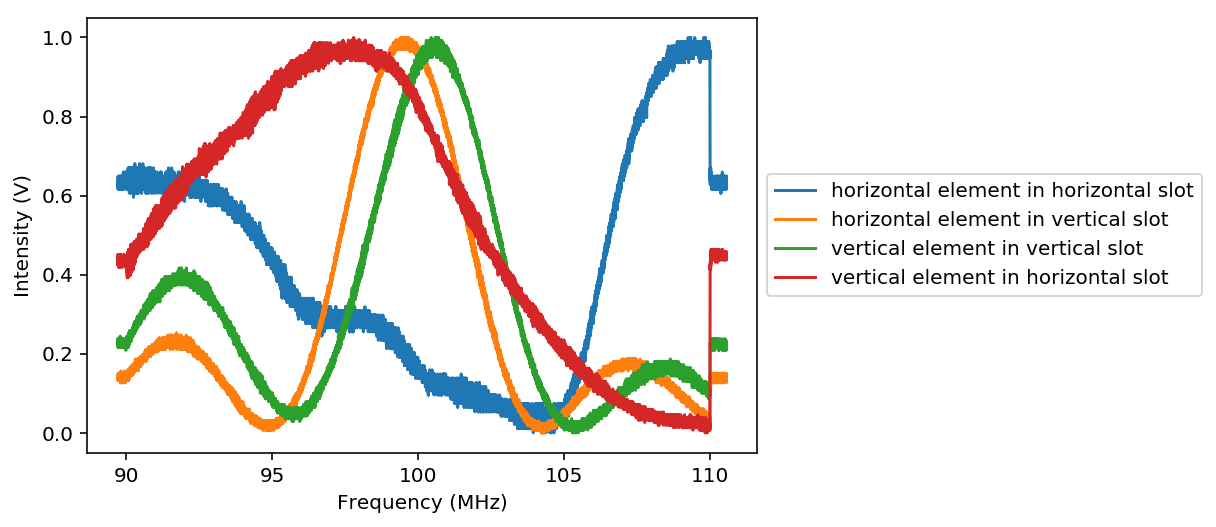

In [7]:
plt.plot(vv.frequency / 10e5, transform.normalize(hh['voltage@1.00']), label='horizontal element in horizontal slot')
plt.plot(hv.frequency / 10e5, transform.normalize(hv['voltage@1.00']), label='horizontal element in vertical slot')
plt.plot(vv.frequency / 10e5, transform.normalize(vv['voltage@1.00']), label='vertical element in vertical slot')
plt.plot(vh.frequency / 10e5, transform.normalize(vh['voltage@1.00']), label='vertical element in horizontal slot')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Intensity (V)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

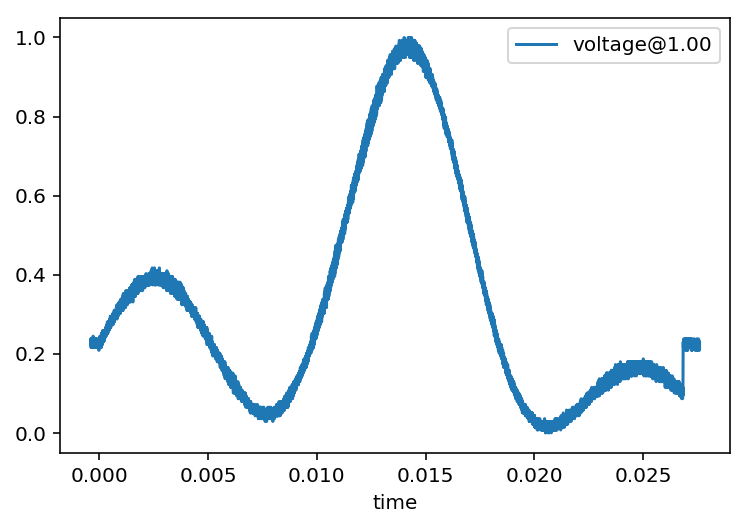

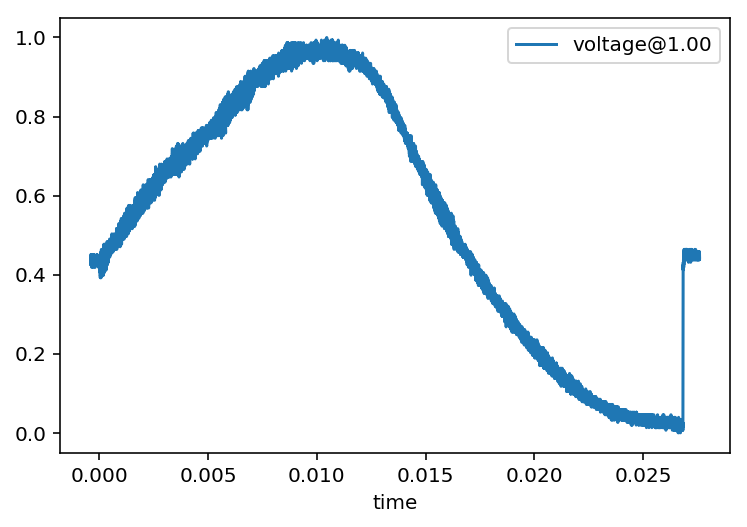

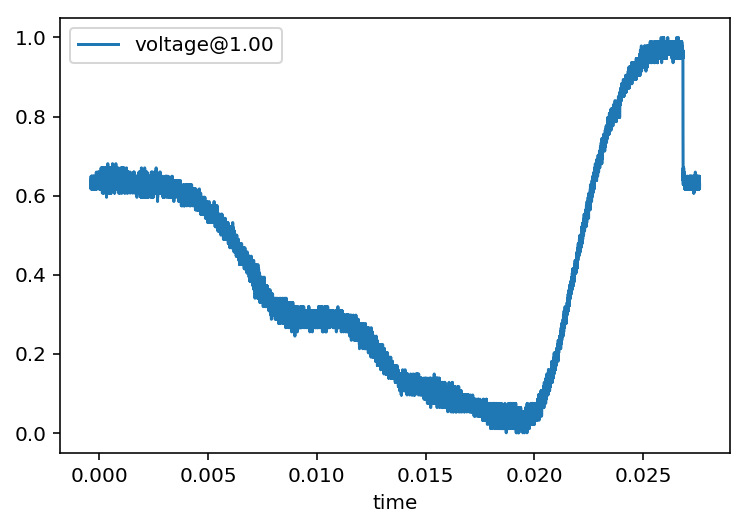

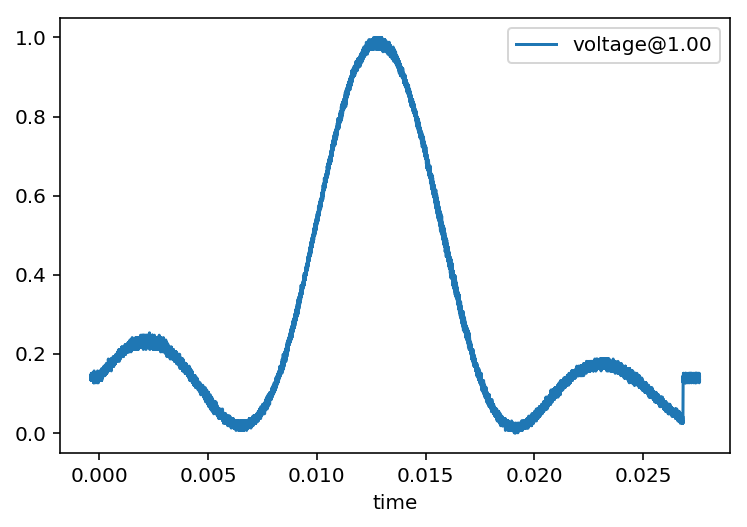

In [8]:
vv.plot('time', 'voltage@1.00')
vh.plot('time', 'voltage@1.00')
hh.plot('time', 'voltage@1.00')
hv.plot('time', 'voltage@1.00')